- https://datascienceschool.net/view-notebook/9341c66303174eea9d35b2e4b6981ed9/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 확률론

데이터는 숫자로 이루어져 있고, 보통 observation과 experiment로 의해 얻어진다.
1. 데이터가 도출가능한 후보 집합이 __표본공간 $\Omega$__ 가 존재한다고 가정한다. (모든 가능한 경우의 수)
2. 모든 사건에 대해서는 __확률__ 이 배정되어있다고 가정한다.
이때, 예측할 수는 없지만 특정한 분포특성을 가지는 데이터를 만들어 내는 활동을 __확률 모형__ 이라고 부른다. (주사위, 코인, experiment).
<br>확률 모형론에서는 데이터의 개별적인 값보다는 데이터의 전체 특성을 주요하게 본다. 특성이 같은 데이터는 동일한 정보를 주는 데이터라고 본다.
- 확률 모형으로부터 데이터를 여러번 생성하는 경우 실제 데이터 값은 매번 달라질 수 있지만 확률 모형은 바뀌지 않는다.
- 확률 모형은 관찰할 수 없다. 다만 실제 데이터값을 이용하여 확률 모형을 추정하고 가정할 뿐이다
- 확률 모형에서 만들어지는 실제 데이터 값은 확률 모형이 가진 특성을 반영하고 있다. 
<br>

우리의 목적은 표본공간에서 관심있는 사건들이 일어날 확률을 나타내는 수학적 모형을 찾아야한다. 표본공간 상에서 정의된 실수 값 함수를 확률변수라고 하고, 이 확률 변수에 대하여 확률 모형을 세우고 확률을 계산한다.

> 확률(probability)이란 사건(부분집합)을 입력하면 숫자(확률값)가 출력되는 함수

# 확률 변수?

수학적으로 확률변수(random variable)은 표본 공간(sample space)를 정의역으로 가지고 실수를 공역을 가지는 함수로 정의한다. 
- 표본 공간의 모든 표본에 대해 어떤 실수 값이 있는 것!
- 표본 공간의 경우에 -> 실수값을 대입하고 -> 이떄 확률을 지정해준다!
- Event 를 probability에 대응시켜주는것이 확률변수이다!

### 확률과 확률 변수의 차이점!

- 확률은 표본으로 이루어진 집합, 즉 사건에 대해 할당된 수다.
- 확률 변수는 표본하나 하나에 할당된 수이다.
    - 확률 모형: 주사위를 던진다
    - 확률 변수 : 주사위를 두번 던져서 나올 숫자의 합

### 연속과 이산?

- 이산(불연속) : 유한개의 값 또는 셀수있는 값으로 구성환 확률 변수
- 연속(연속) : 연속적인 값을 갖는 확률변수

## 우선 연속 확률을 먼저보자!

- 연속확률 : 실수 집합처럼 연속적이고 무한 경우의 수를 가진다.

#### 시계 바늘을 예로 들어보자. 다음과 같은 아날로그 시계의 시계 바늘을 눈을 감고 임의로 돌렸다고 하면 시계 바늘이 정각 12시(각도 0도)를 가리킬 확률은 얼마일까?

이때는 확률 변수가 0, 360 미만의 구간내 균일 분포를 가지게 되므로 답은 0이다!
<br>
전체 사건이 무한대이니까 개별 각도는 0이 되어야한다! 그렇다면 어떻게 연속확률을 설명하지?

## 누적 분포 함수 cdf

그래서 확률을 어떻게 정의할 껀데?
__사건 공간__과 __확률 변수__ 사이의 관계를 잡아보자!

- 확률 분포중에 사건 인터벌을 쓰자!
$$
P(\{ a \leq x < b \}) = P(a, b)
$$

<br/>
- 확률 분포중에서 하나의 값만 쓰고 싶다면? inf 를 쓰자!
$$
P(\{ a \leq x < b \}) = P(\{ -\infty \leq x < b \}) - P(\{ -\infty \leq x < a \})
$$

<br/>
- CDF : 확률 변수가 $-\infty$ 와 $x$ 사이에 존재할 확률
$$
F(x) = P(\{X < x\})
$$

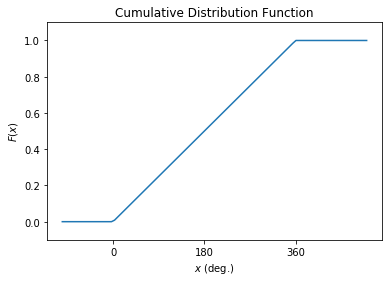

In [3]:
t = np.linspace(-100, 500, 100)
F = t / 360
F[t < 0] = 0
F[t > 360] = 1
plt.plot(t, F)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title("Cumulative Distribution Function")
plt.xlabel("$x$ (deg.)")
plt.ylabel("$F(x)$")
plt.show()

## 확률 밀도 함수 pdf

- 누적 분포 함수는 확률 분포를 함수의 형태로 바꿔준다. (input에 대해 output이 확률로 나온다!)
- 그런데 절대적인 확률이 아니라 상대적인 확률 분포 형태를 보고싶은데??
- 왜? 어떤 확률 변수값이 더 잘 나오는지에 대한 정보가 의사결정에 중요하다고!
- 그렇다면 공간을 확률로 만들자!

$$
\int_{-\infty}^{\infty} f(u)du = 1
$$
<br>

개별 확률 분포값은!
$$
F(x) = \int_{-\infty}^{x} f(u) du
$$

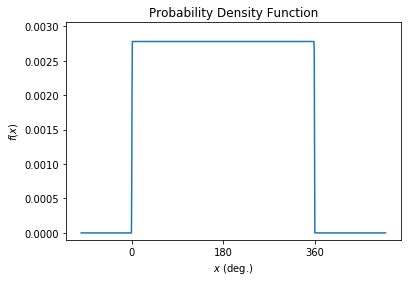

In [7]:
t = np.linspace(-100, 500, 1000)
F = t / 360
F[t < 0] = 0
F[t > 360] = 1
f = np.gradient(F, 600/1000)  # 수치미분
plt.plot(t, f)
plt.ylim(-0.0001, f.max()*1.1)
plt.xticks([0, 180, 360])
plt.title("Probability Density Function")
plt.xlabel("$x$ (deg.)")
plt.ylabel("$f(x)$")
plt.show()

## 누적분포함수(CDF) & 확률 밀도 함수(PDF)
확률의 정의에서 확률은 사건이 표본의 집합에 대해 할당된 숫자라고 하였다. 어떤 사건에 어느 정도의 확률이 할당되었는지를 묘사한 것이 확률 분포이다.
- 누적분포함수(cumulative distribution function cdf)
    - 확률 분포를 모사할때, 확률변수를 이용하여, 사건이 시작점과 끝점이라는 숫자로 이루어진 단순한 구간을 사용하여 나타낼 수 있다. 시작점을 음수 무한대로 고정시키는 방법이 누적분포 함수이다. = 확률이 어느 사건에 어느 정도 분포 되어 있는지를 수학적으로 보여준다.
    - $F(x)=Pr[X\le x]$
<br>

- 확률 밀도함수 (probability density function pdf)
    - 절대적인 확률이 아닌 상대적인 확률 분포 형태만 보기위해 확률 밀도 함수가 등장하였다. 
    - 이산확률변수인 경우 : $F(x)=Pr[X=x]$
    - 연속확률 변수 인 경우 : $F(x) = \int_{-\infty}^{x} f(u) du$

## 이산확률 분포

- 확률 변수의 값이 이산적인 discrete 값을 가지면 이산확률 변수라고 한다.
- 이산확률 분포는 확률 밀도 함수(pdf)를 정의할수 없다.
- 확률 질량 함수를 정의해야한다. 이산 확률 변수의 가능한 값 하나에 대해 확률을 정의해야한다.

### 확률 질량 함수 (pmf)

이산 확률 변수 X가 취할 수 있는 값 X_1~ X_n의 각각에 확률을 대응시켜주는 관계를 확률 질량 함수라고 한다

<function matplotlib.pyplot.show(*args, **kw)>

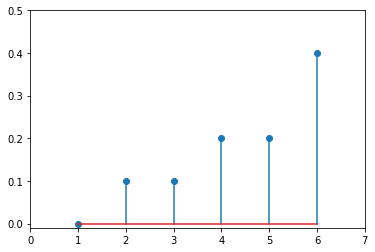

In [5]:
x = np.arange(1,7)
y = np.array([0.0, 0.1, 0.1, 0.2, 0.2, 0.4])
plt.stem(x, y)
plt.xlim(0, 7)
plt.ylim(-0.01, 0.5)
plt.show

(-0.01, 1.1)

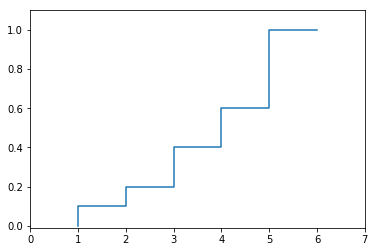

In [6]:
x = np.arange(1,7)
y = np.array([0.0, 0.1, 0.1, 0.2, 0.2, 0.4])
z = np.cumsum(y)
plt.step(x, z)
plt.xlim(0, 7)
plt.ylim(-0.01, 1.1)

-------

# 통계학 (Statistics)
데이터를 정보로 만드는 수단

### 정의
- 많은 양의 수치자료를 수집하고, 정리, 요약 및 해석하는 방법을 다루는 과학의 한 분야
- 관심의 대상에 대한 자료를 수집하여, 정리, 요약하고, 이들 자료에 포함된 정보를 토대로 불확실한 사실에 대해 과학적 판단을 내릴 수 있도록 방법을 제시해주는 학문
- 관측 자료를 바탕으로 추론(inference)을 하는 과학의 한 분야로서 불확실성(uncertainty)하에서 보다 합리적인 의사 결정을 하는 방법을 제시해 주는 학문
<br/>

### 기술통계학 (descriptive statistics)
수집된 자료를 정리 및 요약하는 방법을 다루는 통계학. 자료를 표와 그래프로 나타내고 대표값과 산포도로 전반적인 특성을 표현한다.

- 표준화 (Standardization) : 데이터를 __비교,분석__하기위해 다양한 종류의 데이터를 정규분포를 기준으로 나타내는 거다. 관측값에서 평균을 뺴고 표준편차로 나눈다. 

### 추측 통계학 (Inferential statistics)
주어진 자료의 정보를 분석해서 미래의 일어날 상황을 예측하는 통계학. 통계적 추론에서 얻어진 추측이니 어느정도 불확실서을 가지고 있다. 이를 표현하기 위해 확률론을 기반으로 둔다.

#### 모집단과 표본
- 모집단(population) : 관심 있는 특서을 수치로 나타낸 연구 대상. 연구 대상이 같더라도 관심을 가진 특성이 다르면 모집단도 달라질 수 있다.
- 표본(Sample) : 모집단으로 부터 뽑은 부분집합. 조사대상을 의미한다.
- 모수(Parameter) : 모집단의 특성을 나타내는 양적인 값으로 고유한 상수를 나타낸다.

#### 모수에 대한 추론
- 추정 (estimation) : 미지의 모수의 값이 얼마인지, 또는 어떤 범위내에 있는지 표본 결과로 부터 추측하는 것
- 가설의 검정 (test of hypothesis) : 모수의 값의 범위를 구하는 두개의 결과를 세우고 참인지를 표본의 결과로 부터 판단하는 것.

# 확률론 vs 통계학

- 확률론적 관점 : 이미 알고있는 모집단에서 어떤 사건이 일어날 것인가?
- 통계적 관점 : 표본에서 얻은 정보를 이용하여 미지의 모집단을 추론해 보자

# 기술통계학 - 확률적 데이터와 분포 특성

- 결정론적 데이터 : 항상 동일한 값이 나오는 데이터를 결정론적 데이터
- 확률적 데이터 : 예측하지 않고 Sampling에 따라 다른 값이 나오는 것이 확률적 데이터라고합니다.
    - 데이터 집합의 분포 특성이 중요하다.
    - 특징을 나타내는 값
        - 평균 mean()
        - 중앙 median()
        - 히스토그램 계산 histogram()
        - 최빈 argmax()


In [43]:
np.random.seed(0)
x = np.random.normal(size=100)

In [44]:
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

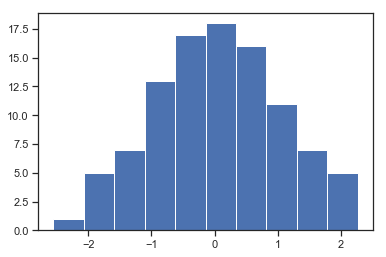

In [45]:
plt.hist(x)
plt.show()

In [46]:
np.mean(x), np.median(x)

(0.059808015534485, 0.09409611943799814)

In [47]:
#np.linspace(시작, 끝, 갯수) (-10,10,20 = -10부터 10까지 20개 단위로 나눠보자!) 
ns, bins = np.histogram(x, bins=np.linspace(-10,10,20))
print(ns, bins)

[ 0  0  0  0  0  0  0  6 21 45 21  7  0  0  0  0  0  0  0] [-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


In [48]:
M = np.argmax(ns)
bins[M], bins[M+1]

(-0.526315789473685, 0.5263157894736832)

-------

## 여기서 문제!

- NumPy를 사용하여 100개의 숫자를 무작위로 생성한 후 히스토그램을 그리고 샘플 평균을 구한다.
- 100개의 숫자 생성 및 샘플 평균 계산을 50번 반복하여 50개의 샘플 평균을 구한다.
- 그다음 2번쨰 자리에서 반올림 해보자!

In [49]:
sample_mean = []
for i in range(100):
    np.random.seed(i)
    x = np.random.normal(size=100)
    sample_mean.append(np.mean(x))

In [52]:
np.array(sample_mean).mean()

0.003434984349080735

In [53]:
np.array(sample_mean).mean().round(2)

0.0

# 분산과 표준편차

- 데이터 집합의 특성을 나타내기 위해 사용되는 또 다른 특징값으로는 분산과 표준편차가 있다.
- 평균이나 기댓값이 분포의 위치를 대표하는 것이라면, 분포의 폭을 대표한다

$$
s^2 = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-m)^2
$$

### 비편향 샘플 분산

$$
s^2_{\text{unbiased}} = \dfrac{1}{N-1}\sum_{i=1}^{N} (x_i-m)^2
$$

- 분산 : var()
- 표준편차 : std()

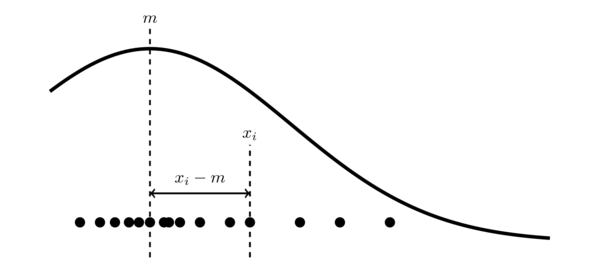

In [54]:
np.var(x)

0.9812079031734594

In [55]:
#샘플링을 가정한 비 편향 표준편차!
np.var(x, ddof=1)

0.9911190941146054

# 외도, 첨도, 모멘트

- 외도(Skewness) : 평균과의 거리의 세제곱을 이용하여 구한 특징값은 왜도이다 | 대칭성을 보고싶을때 구한다
- 첨도(Kurtosis) : 평균과의 거리의 네제곱을 이용하여 구한 특징값을 첨도라고한다 | 데이터가 중앙에 몰려있는지를 보고싶을때 쓴다.
- 모멘트(Moment) : 고차의 제곱을 통해 구하는 특징값이다. 평균은 1차 모멘트, 분산은 2차 모멘트, 왜도와 첨도는 3,4차 모멘트이다

## 같은 확률 분포란?

$$
\begin{eqnarray}
평균 : \text{E}[X] &=& \text{E}[Y] \\
분산 : \text{E}[(X-\mu_X)^2] &=& \text{E}[(Y-\mu_Y)^2] \\
왜도 : \text{E}[(X-\mu_X)^3] &=& \text{E}[(Y-\mu_Y)^3] \\
첨도 : \text{E}[(X-\mu_X)^4] &=& \text{E}[(Y-\mu_Y)^4] \\
\text{E}[(X-\mu_X)^5] &=& \text{E}[(Y-\mu_Y)^5] \\
\vdots &=& \vdots \\
\end{eqnarray}
$$

------------

# 공분산과 상관계수

__1차원 -> 2차원__

> 확률 변수를 하나만 가지고 놀다가 이제 2개로 가보자!

> - 공분산 : 자료가 평균값으로부터 얼마나 떨어져 있는가?에 관한 크기(분산에도 나와있음)과 방향성
> - 상관계수 : 방향성 만을 분리해서 보는것, 공분산을 샘플 표준편차로 정규화하여 정의합니다.

- 두 개 이상의 서로 관련을 가지는 자료 값의 집합이나 혹은 확률 변수들의 결합 분포는 결합확률 분포로 나타납니다! 하나가 움직일때 같이 움직이니까!
- 다변수 확률 변수도, 단변수 경우처럼 평균, 분산과 같은 대표값을 가질 수 있다. 그 중 가장 중요한 것이 자료 간의 상관 관계를 나타내는 공분산(covariance)과 상관계수(correlation coefficient)이다. 공분산과 상관계수도 샘플 자료 집합에 대해 정의되는 샘플 공분산, 샘플 상관계수와, 확률 변수에 대해 정의되는 공분산, 상관계수가 있습니다.

### Sample 공분산

$$
s_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-m_x)(y_i-m_y)
$$

샘플 공분산(sample covariance)은 다음과 같이 정의된다. 여기에서  xi 와  yi 는 각각  i 번째의  x  자료와  y 자료의 값을 가리키고,  $m_x$ 와  $m_y$ 는  $x$  자료와  $y$ 자료의 샘플 평균을 가리킨다.

- 즉 자료가 평균값(전체의 대표)와 얼마나 떨어져 있는지를 나타낸 것!
- 자료들의 크기와 방향성을 같이 보여준다.

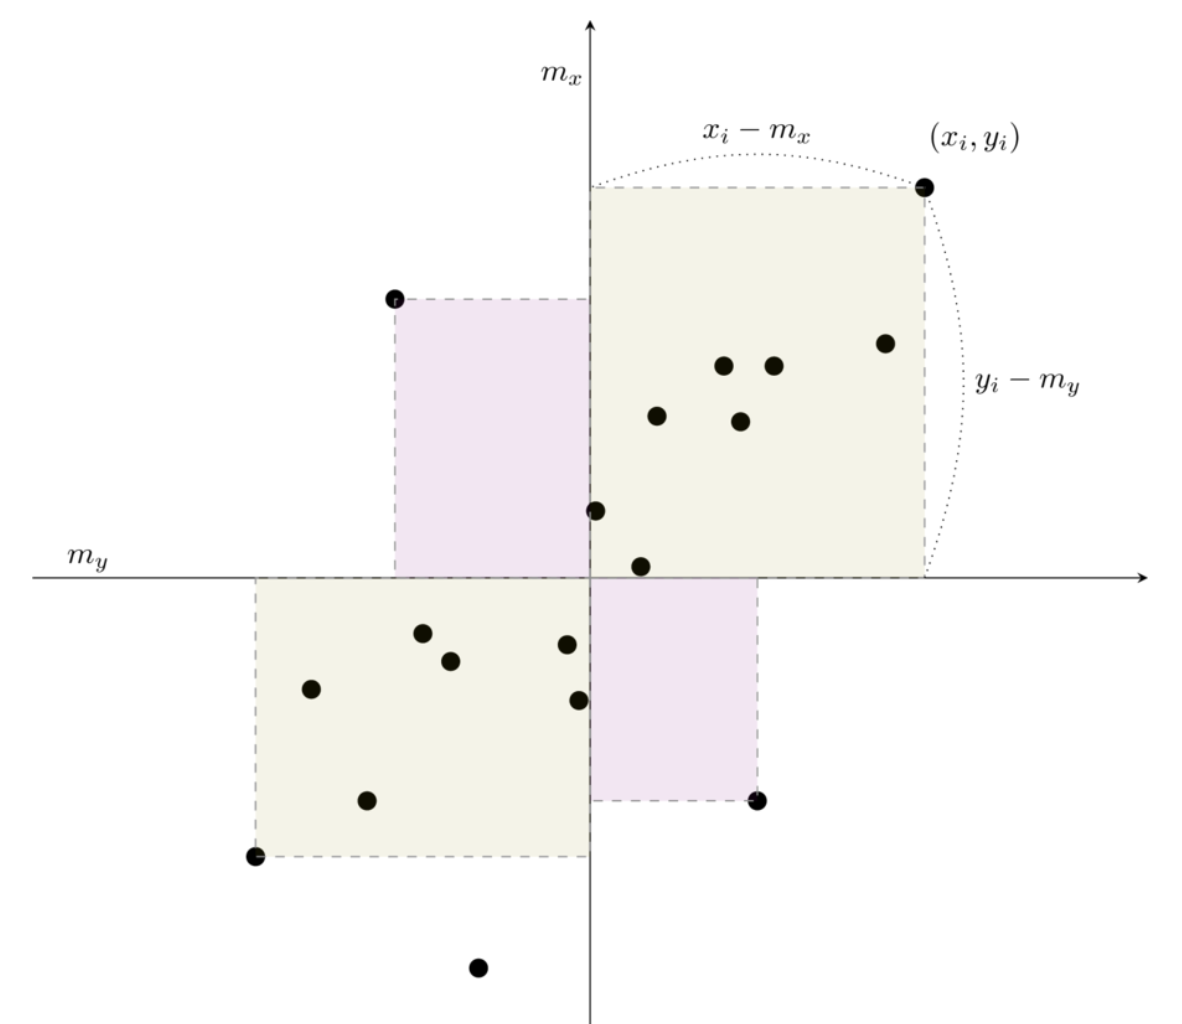

## 샘플 상관계수 (sample correlation coefficient)

- 크기가 오히려 방해가 될때는 정규화하여(normalize) 방향성만 한번 보자!
- Pearson 상관계수!
$$
r_{xy} = \dfrac{s_{xy}}{\sqrt{s^2_{x} \cdot s^2_{y}}}
$$

- 확률변수의 상관계수는 -1~1의 관계를 가진다
    - 1 : 완전 선형 상관관계
    - 0 : 무상관 (독립은 아니다!)
    - -1 : 완전 선형 반 상관관계

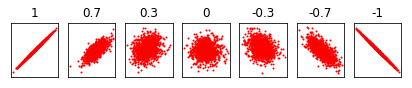

In [21]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 1))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r)
plt.show()

In [8]:
import seaborn as sns

In [12]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

In [37]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


/Users/seungheondoh/anaconda3/envs/python3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


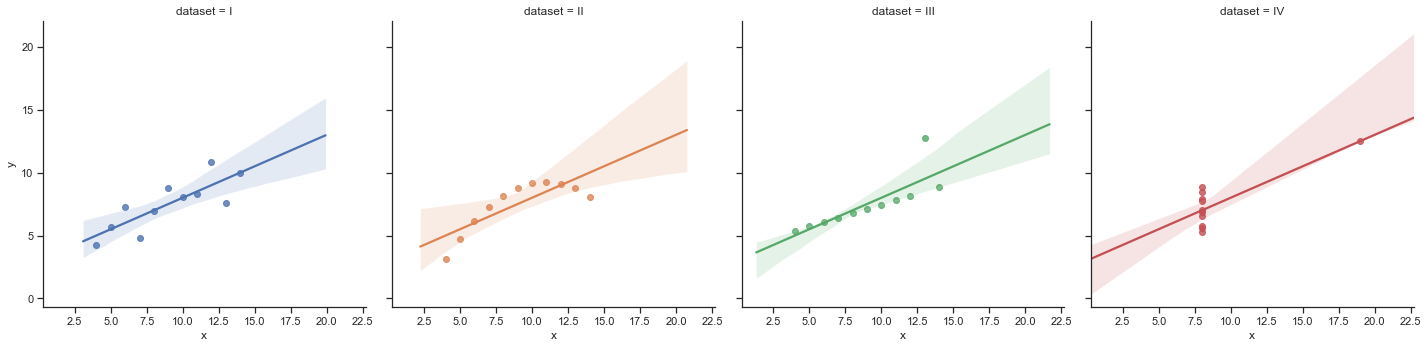

In [38]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df)

### 개별자료와 상관관계!

상관계수로 분포의 형상을 추측할 때 주의할 점은 개별 자료가 상관계수에 미치는 영향력이 각각 다르다는 점이다. 4종류의 2차원 데이터셋을 포함하는데 4종류 데이터셋 모두 상관계수가 약 0.816로 동일하다.

In [35]:
df.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


In [36]:
df.cov()

,x,y
x,10.232558,5.115581
y,5.115581,3.837388


#### MLE의 단점은 무엇이고, 이를 MAP는 어떻게 보안했나요??

1. MLE의 단점 : 
    1.1 관측된 결과에 의해 확률이 결정되기 때문에, 예외적인 결과(극단적인 값)가 반영될 경우 결과 값이 왜곡될수 있습니다.

2. MAP의 보안된 속성 : 사전확률 정보를 알고 있다면, 베이즈 정리를 통해, 사후확률을 추론할 수 있기 때문에, 현실적인 추론이 가능해집니다. 대부분의 경우 우리는 데이터를 통해 사전 정보를 알고 있는 경우가 많으며, 이를 통해 사후 확률을 추론하는 경우가 많아 현실 문제에 적합합니다.

#### 그렇다면 MAP의 단점은?
1. 데이터의 부족 : 데이터가 부족시 사전확률에 대핸 정보가 부족할 수 있습니다.
2. 사전 정보의 사전지식 부족 : a, b에 대한 가정이 만약 부족하거나 잘못되었다면 문제가 생긴다.